<a href="https://colab.research.google.com/github/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9A%D0%9F_%E2%84%963_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №3

## Імпорт основних модулів

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1.Обрати набір даних на ресурсі https://www.kaggle.com/datasets . Дані мають містити якісні дані (мінімум три змінні). Кожна змінна з даного набору даних може мати максимум 4 градації.

Завантаження даних, що ввідповідають умові завадння

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/xAPI-Edu-Data.csv")

Переглянемо завантаженні дані командою `.head()` та виберемо лише 3 якісні змінні

In [4]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

Для виконання роботи візьмемо наступні змінні:
- gender (стать) - Має дві градації: чоловіки (M) та жінки (F).
- Semester (семестр) - Має дві градації: перший семестр (F) та другий семестр (S).
- StudentAbsenceDays (кількість днів відсутності) - Має дві градації: менше 7 днів (Under-7) та більше 7 днів (Above-7).

## 2.Візуалізувати розподіл даних для трьох змінних з обраного набору даних.

<ipython-input-7-2abe5d775686>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='coolwarm')
<ipython-input-7-2abe5d775686>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Semester', data=data, palette='coolwarm')
<ipython-input-7-2abe5d775686>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='StudentAbsenceDays', data=data, palette='coolwarm')


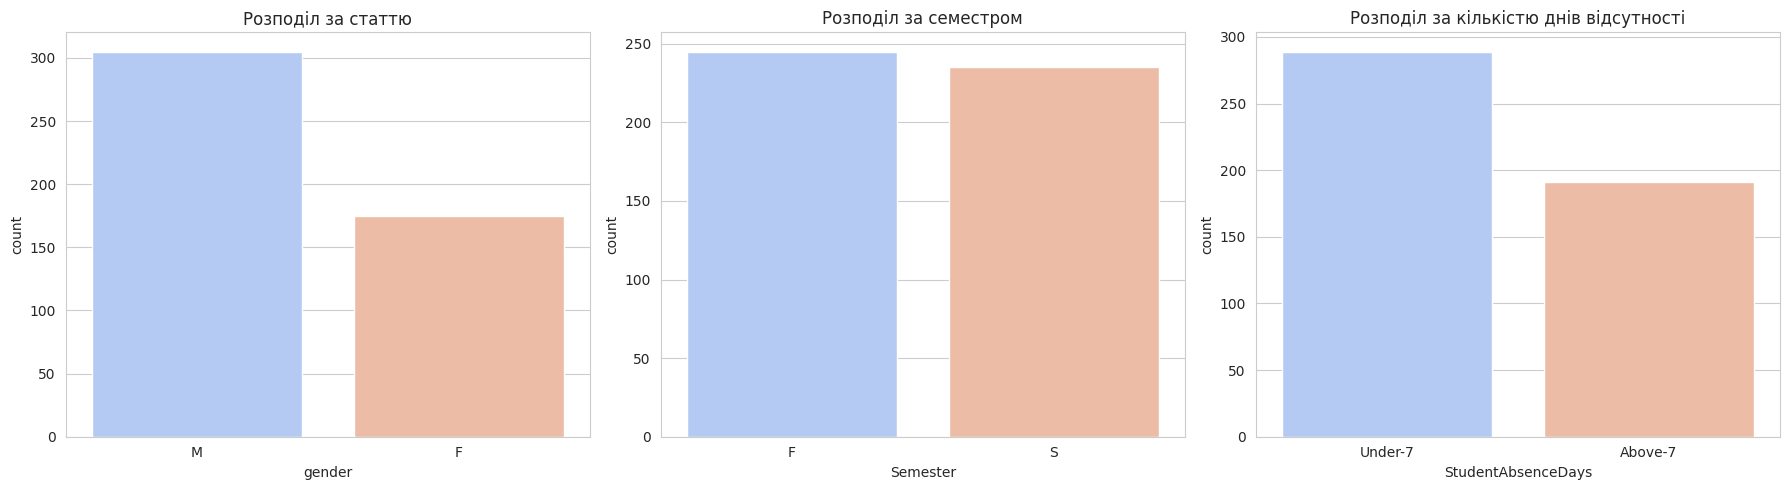

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(18, 5))

# Грaфік гендеру
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=data, palette='coolwarm')
plt.title('Розподіл за статтю')

# Графік за семестром
plt.subplot(1, 3, 2)
sns.countplot(x='Semester', data=data, palette='coolwarm')
plt.title('Розподіл за семестром')

# Графік пропусків
plt.subplot(1, 3, 3)
sns.countplot(x='StudentAbsenceDays', data=data, palette='coolwarm')
plt.title('Розподіл за кількістю днів відсутності')

plt.tight_layout()
plt.show()


З графіків можна сказати, що у вибірці більша кількість студентів чоловічої статі ніж жіночої. Розподіл студентів за семестрами майже однаковий, хоча студентів у другому семестрі трохи менше, що може бути пов'язане з відрахуванням після сесії. Більше студентів мають менше 7 днів відсутності порівняно з тими, хто має більше 7 днів відсутності

## 3.Розрахувати таблиці спряженості для кожної попарної комбінації змінних.

###Таблиця спряженості для gender/Semester

In [9]:
contingency_table_gender_semester = pd.crosstab(index=data['gender'], columns=data['Semester'])
contingency_table_gender_semester

Semester,F,S
gender,,
F,95,80
M,150,155


###Таблиця спряженості gender/StudentAbsenceDays

In [10]:
contingency_table_gender_absence = pd.crosstab(index=data['gender'], columns=data['StudentAbsenceDays'])
contingency_table_gender_absence

StudentAbsenceDays,Above-7,Under-7
gender,,
F,46,129
M,145,160


###Таблиця спряженості Semester/StudentAbsenceDays

In [11]:
contingency_table_semester_absence = pd.crosstab(index=data['Semester'], columns=data['StudentAbsenceDays'])
contingency_table_semester_absence

StudentAbsenceDays,Above-7,Under-7
Semester,,
F,106,139
S,85,150


## 4.Розрахувати таблиці спряженості з відсотковим розподілом для кожної попарної комбінації змінних.

###Таблиця спряженості для gender/Semester(у відсотках)

In [16]:
contingency_table_gender_semester_percent = contingency_table_gender_semester.apply(lambda r: r/r.sum() * 100, axis=1)
contingency_table_gender_semester_percent

Semester,F,S
gender,,
F,54.285714,45.714286
M,49.180328,50.819672


###Таблиця спряженості gender/StudentAbsenceDays(у відсотках)

In [17]:
contingency_table_gender_absence_percent = contingency_table_gender_absence.apply(lambda r: r/r.sum() * 100, axis=1)
contingency_table_gender_absence_percent

StudentAbsenceDays,Above-7,Under-7
gender,,
F,26.285714,73.714286
M,47.540984,52.459016


###Таблиця спряженості Semester/StudentAbsenceDays(у відсотках)

In [18]:
contingency_table_semester_absence_percent = contingency_table_semester_absence.apply(lambda r: r/r.sum() * 100, axis=1)
contingency_table_semester_absence_percent

StudentAbsenceDays,Above-7,Under-7
Semester,,
F,43.265306,56.734694
S,36.170213,63.829787


## 5.Сформулювати нульові та альтернативні гіпотези для кожної пари змінних.

Статистична гіпотеза для даного критерію має наступний вигляд:

• Основна (нульова). Ознаки не пов'язані.

• Конкуруюча (альтернативна). Ознаки пов'язані.

Стать та Семестр:

Нульова гіпотеза (H0): Стать не пов'язана зі семестром, в якому навчається студент.

Альтернативна гіпотеза (H1): Існує зв'язок між статтю студента та семестром навчання.

Стать та Кількість днів відсутності:

Нульова гіпотеза (H0): Стать не впливає на кількість днів відсутності студента.

Альтернативна гіпотеза (H1): Існує зв'язок між статтю студента та кількістю днів його відсутності.

Семестр та Кількість днів відсутності:

Нульова гіпотеза (H0): Семестр навчання не впливає на кількість днів відсутності студента.

Альтернативна гіпотеза (H1): Існує зв'язок між семестром навчання студента та кількістю днів його відсутності.

## 6.Перевірити гіпотези та сформувати висновок.

Тепер після сформування гіпотез можемо їх перевірити за допомогою критерію хі-квадрат Пірсона

In [21]:
from scipy.stats import chi2_contingency

In [25]:
# Пара 1: Стать та Семестр
chi2_gender_semester, p_gender_semester, _, _ = chi2_contingency(contingency_table_gender_semester)
# Вивід результатів
print("Стать та Семестр:")
print(f"Хі-квадрат: {chi2_gender_semester:.4f}")
print(f"p-value: {p_gender_semester:.4f}")

Стать та Семестр:
Хі-квадрат: 0.9645
p-value: 0.3260


Нульова гіпотеза про відсутність зв'язку між статтю студента та семестром, в якому він навчається, не була відкинута. p-value (0.326) вище за 0.05, що вказує на відсутність статистично значущого зв'язку між цими змінними. Таким чином, стать студента не впливає на вибір семестру навчання.

In [26]:
# Пара 2: Стать та Кількість днів відсутності
chi2_gender_absence, p_gender_absence, _, _ = chi2_contingency(contingency_table_gender_absence)
# Вивід результатів
print("\nСтать та Кількість днів відсутності:")
print(f"Хі-квадрат: {chi2_gender_absence:.4f}")
print(f"p-value: {p_gender_absence:.4f}")


Стать та Кількість днів відсутності:
Хі-квадрат: 20.0914
p-value: 0.0000


Було відкинуто нульову гіпотезу про відсутність зв'язку між статтю студента та кількістю днів його відсутності. p-value (0.00000738) значно менше 0.05, що свідчить про наявність статистично значущого зв'язку між статтю та кількістю днів відсутності. Це може вказувати на те, що чоловічі та жіночі студенти мають різні патерни відвідуваності.

In [27]:
# Пара 3: Семестр та Кількість днів відсутності
chi2_semester_absence, p_semester_absence, _, _ = chi2_contingency(contingency_table_semester_absence)
# Вивід результатів
print("\nСеместр та Кількість днів відсутності:")
print(f"Хі-квадрат: {chi2_semester_absence:.4f}")
print(f"p-value: {p_semester_absence:.4f}")


Семестр та Кількість днів відсутності:
Хі-квадрат: 2.2329
p-value: 0.1351


Нульова гіпотеза про відсутність зв'язку між семестром навчання та кількістю днів відсутності також не була відкинута. p-value (0.135) вище за 0.05, що вказує на відсутність статистично значущого зв'язку між цими змінними. Це означає, що кількість днів відсутності не залежить від того, в якому семестрі навчається студент.

## Висновок

Дослідження показало, що єдина пара змінних, між якими існує статистично значущий зв'язок, це стать студента та кількість днів його відсутності.